In [1]:
# Import libraries of python
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv file 
df = pd.read_csv('bangalore.csv')
data = df.sample(n=100)
data

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
60,Octave Himalaya Monarch,4.0,Very Good,2624.0,3.0,Gandhi Nagar,NaN,NaN,"1,645",333
65,Ballal Residency,3.9,Very Good,875.0,3.0,Residency Road,MG Road,2.3 km,"3,084",836
51,Zone By The Park Infantry,3.9,Very Good,762.0,5.0,Infantry Road,MG Road,1.9 km,"4,252","1,021"
44,BloomSuites | Electronic City,4.1,Very Good,643.0,4.0,Electronic City,NaN,NaN,"5,000",NaN
13,Fortune Select JP Cosmos - Member ITC Hotel Group,4.0,Very Good,2944.0,5.0,Vasanth Nagar,Bangalore Palace,2.9 km,"5,999",NaN
...,...,...,...,...,...,...,...,...,...,...
22,"Vivanta Bengaluru, Residency Road",4.3,Excellent,1022.0,5.0,Residency Road,MG Road,1.5 km,"7,000",NaN
7,Lemon Tree Hotel Electronics City Bangalore,4.1,Very Good,2314.0,4.0,Electronic City,NaN,NaN,"2,598","1,016"
33,Holiday Inn Express Bengaluru Whitefield ITPL,3.5,Very Good,1242.0,3.0,Whitefield,NaN,NaN,"3,399",NaN
78,Fairfield By Marriott Bengaluru Rajajinagar,3.9,Very Good,883.0,4.0,Rajajinagar,NaN,NaN,"5,400",NaN


In [48]:
# print the info and null values sum

print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 76
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            100 non-null    object 
 1   Rating                99 non-null     float64
 2   Rating Description    99 non-null     object 
 3   Reviews               99 non-null     float64
 4   Star Rating           85 non-null     float64
 5   Location              100 non-null    object 
 6   Nearest Landmark      33 non-null     object 
 7   Distance to Landmark  33 non-null     object 
 8   Price                 100 non-null    object 
 9   Tax                   64 non-null     object 
dtypes: float64(3), object(7)
memory usage: 8.6+ KB
None
Hotel Name               0
Rating                   1
Rating Description       1
Reviews                  1
Star Rating             15
Location                 0
Nearest Landmark        67
Distance to Landmark    67
Price           

In [5]:
# cleaning data and preprocessing
data.dropna()
data.drop_duplicates()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
60,Octave Himalaya Monarch,4.0,Very Good,2624.0,3.0,Gandhi Nagar,NaN,NaN,"1,645",333
65,Ballal Residency,3.9,Very Good,875.0,3.0,Residency Road,MG Road,2.3 km,"3,084",836
51,Zone By The Park Infantry,3.9,Very Good,762.0,5.0,Infantry Road,MG Road,1.9 km,"4,252","1,021"
44,BloomSuites | Electronic City,4.1,Very Good,643.0,4.0,Electronic City,NaN,NaN,"5,000",NaN
13,Fortune Select JP Cosmos - Member ITC Hotel Group,4.0,Very Good,2944.0,5.0,Vasanth Nagar,Bangalore Palace,2.9 km,"5,999",NaN
...,...,...,...,...,...,...,...,...,...,...
22,"Vivanta Bengaluru, Residency Road",4.3,Excellent,1022.0,5.0,Residency Road,MG Road,1.5 km,"7,000",NaN
7,Lemon Tree Hotel Electronics City Bangalore,4.1,Very Good,2314.0,4.0,Electronic City,NaN,NaN,"2,598","1,016"
33,Holiday Inn Express Bengaluru Whitefield ITPL,3.5,Very Good,1242.0,3.0,Whitefield,NaN,NaN,"3,399",NaN
78,Fairfield By Marriott Bengaluru Rajajinagar,3.9,Very Good,883.0,4.0,Rajajinagar,NaN,NaN,"5,400",NaN


In [7]:
# understanding descriptive statastics
descriptive_stats = data.describe()
descriptive_stats

,Rating,Reviews,Star Rating
count,99.000000,99.000000,86.000000
mean,4.034343,1239.000000,4.081395
std,0.351139,1051.608476,0.814791
min,3.000000,13.000000,3.000000
25%,3.800000,513.000000,3.000000
50%,4.000000,1006.000000,4.000000
75%,4.300000,1732.500000,5.000000
max,4.800000,5089.000000,5.000000


In [11]:
# Filter only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[float, int])

# Calculate and display the correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


               Rating   Reviews  Star Rating
Rating       1.000000 -0.046447     0.531049
Reviews     -0.046447  1.000000     0.291956
Star Rating  0.531049  0.291956     1.000000


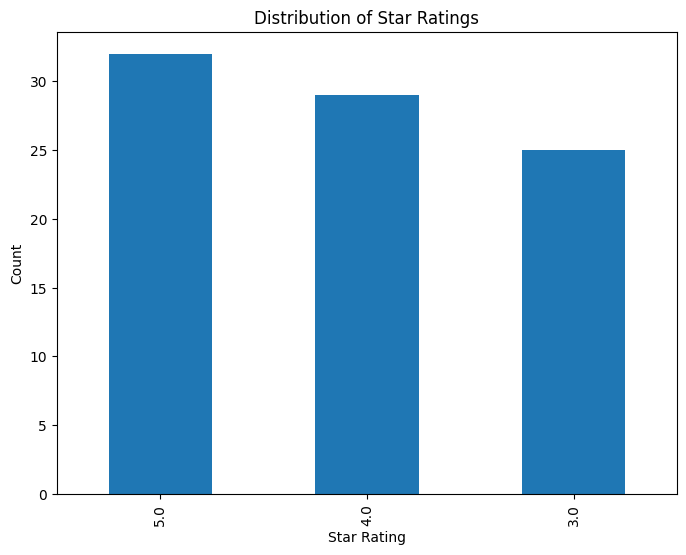

In [12]:
def plot_star_rating_distribution(data):
    plt.figure(figsize=(8, 6))
    star_counts = data['Star Rating'].value_counts()
    star_counts.plot(kind='bar')
    plt.title('Distribution of Star Ratings')
    plt.xlabel('Star Rating')
    plt.ylabel('Count')
    plt.show()
plot_star_rating_distribution(data)

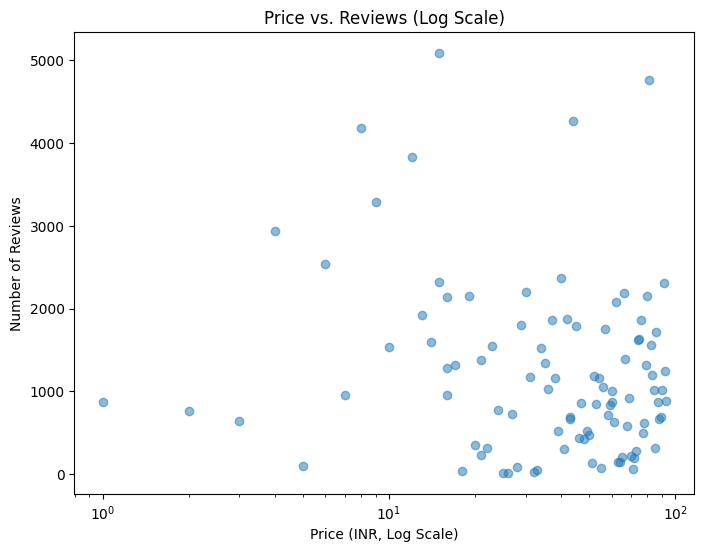

In [16]:
def plot_price_vs_reviews_log(data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Price'], data['Reviews'], alpha=0.5)
    plt.xscale('log')
    plt.title('Price vs. Reviews (Log Scale)')
    plt.xlabel('Price (INR, Log Scale)')
    plt.ylabel('Number of Reviews')
    plt.show()

plot_price_vs_reviews_log(data)

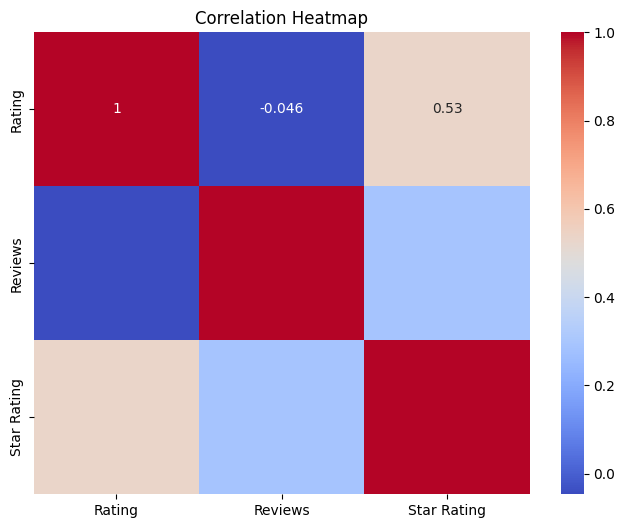

In [18]:
# heat map for correlation matrix
def plot_correlation_heatmap(correlation_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
plot_correlation_heatmap(correlation_matrix)